#  Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings   
warnings.filterwarnings("ignore")

# Data Inspection

In [2]:
# Reading data
train = pd.read_csv("train_E1GspfA.csv")
test = pd.read_csv("test_6QvDdzb.csv")

In [3]:
# Shape of data
train.shape,test.shape

((18247, 3), (7650, 2))

In [4]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [5]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [6]:
# Checking for missing values
train.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [7]:
# Checking for missing values
test.isnull().sum()

date    0
hour    0
dtype: int64

In [8]:
# Checking datatype
train.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [9]:
# Checking datatype
test.dtypes

date    object
hour     int64
dtype: object

# Typecasting

In [10]:
# Typecasting variables
train['date']= pd.to_datetime(train['date'])
test['date']= pd.to_datetime(test['date'])

In [11]:
train.dtypes

date      datetime64[ns]
hour               int64
demand             int64
dtype: object

In [12]:
test.dtypes

date    datetime64[ns]
hour             int64
dtype: object

# Feature Engineering

In [13]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [14]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [15]:
# extracting new columns from "date" for train dataset
train['day']=train['date'].dt.day
train['month']=train['date'].dt.month
train['year']=train['date'].dt.year
train['quarter']=train['date'].dt.quarter
train['weekday']=train['date'].dt.weekday
train['dayofyear']=train['date'].dt.dayofyear
train['weekofyear']=train['date'].dt.weekofyear
train['is_weekend'] = np.where(train['weekday'].isin([6,5]),1,0)

In [16]:
# extracting new columns from "date" for test dataset
test['day']=test['date'].dt.day
test['month']=test['date'].dt.month
test['year']=test['date'].dt.year
test['quarter']=test['date'].dt.quarter
test['weekday']=test['date'].dt.weekday
test['dayofyear']=test['date'].dt.dayofyear
test['weekofyear']=test['date'].dt.weekofyear
test['is_weekend'] = np.where(test['weekday'].isin([6,5]),1,0)

In [17]:
train.head()

,date,hour,demand,day,month,year,quarter,weekday,dayofyear,weekofyear,is_weekend
0,2018-08-18,9,91,18,8,2018,3,5,230,33,1
1,2018-08-18,10,21,18,8,2018,3,5,230,33,1
2,2018-08-18,13,23,18,8,2018,3,5,230,33,1
3,2018-08-18,14,104,18,8,2018,3,5,230,33,1
4,2018-08-18,15,81,18,8,2018,3,5,230,33,1


In [18]:
test.head()

,date,hour,day,month,year,quarter,weekday,dayofyear,weekofyear,is_weekend
0,2021-03-01,0,1,3,2021,1,0,60,9,0
1,2021-03-01,1,1,3,2021,1,0,60,9,0
2,2021-03-01,2,1,3,2021,1,0,60,9,0
3,2021-03-01,3,1,3,2021,1,0,60,9,0
4,2021-03-01,5,1,3,2021,1,0,60,9,0


In [19]:
train.dtypes

date          datetime64[ns]
hour                   int64
demand                 int64
day                    int64
month                  int64
year                   int64
quarter                int64
weekday                int64
dayofyear              int64
weekofyear             int64
is_weekend             int64
dtype: object

In [20]:
test.dtypes

date          datetime64[ns]
hour                   int64
day                    int64
month                  int64
year                   int64
quarter                int64
weekday                int64
dayofyear              int64
weekofyear             int64
is_weekend             int64
dtype: object

# Model Building

In [21]:
train_cleaned=train.drop('date',axis=1) 
test_cleaned=test.drop('date',axis=1)

In [22]:
train_cleaned.head()

,hour,demand,day,month,year,quarter,weekday,dayofyear,weekofyear,is_weekend
0,9,91,18,8,2018,3,5,230,33,1
1,10,21,18,8,2018,3,5,230,33,1
2,13,23,18,8,2018,3,5,230,33,1
3,14,104,18,8,2018,3,5,230,33,1
4,15,81,18,8,2018,3,5,230,33,1


In [23]:
test_cleaned.head()

,hour,day,month,year,quarter,weekday,dayofyear,weekofyear,is_weekend
0,0,1,3,2021,1,0,60,9,0
1,1,1,3,2021,1,0,60,9,0
2,2,1,3,2021,1,0,60,9,0
3,3,1,3,2021,1,0,60,9,0
4,5,1,3,2021,1,0,60,9,0


In [24]:
# Seperating independent and dependent variables
y = train_cleaned['demand']
X = train_cleaned.drop(['demand'], axis=1)

In [25]:
# Creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, test_size=0.25)

In [26]:
# Import required libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error

## KNN

In [ ]:
#creating the knn function
knn = KNeighborsRegressor()

In [ ]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#predictions 
train_predict = knn.predict(X_train)
val_predict = knn.predict(X_valid)
test_predict = knn.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  28.264509945687323
Validation RMSE:  35.31657294272923


## Tuning KNN

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn_params = {'leaf_size' : range(25, 50),
              'n_neighbors' : range(5, 20, 2), 
              'p': [1,2],
              'weights': ['uniform', 'distance'] 
              }

In [ ]:
random_search = RandomizedSearchCV(KNeighborsRegressor(), 
                                   param_distributions = knn_params, 
                                   scoring=mean_squared_error, 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose = 1,
                                   n_iter = 10)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'leaf_size': range(25, 50),
                                        'n_neighbors': range(5, 20, 2),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring=<function mean_squared_error at 0x7f9034f89a70>,
                   verbose=1)

In [ ]:
random_search.best_params_

{'leaf_size': 48, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

In [ ]:
random_search.best_estimator_

KNeighborsRegressor(leaf_size=48, n_neighbors=7)

## Creating a knn instance with new hyperparameter values

In [ ]:
#creating the knn function
knn = random_search.best_estimator_

In [ ]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=48, n_neighbors=7)

In [ ]:
#predictions 
train_predict = knn.predict(X_train)
val_predict = knn.predict(X_valid)
test_predict = knn.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  29.59947987635359
Validation RMSE:  34.4433227009781


## Linear Regression

In [ ]:
#creating the Linear regression function
lr = LinearRegression()

In [ ]:
#fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predictions 
train_predict = lr.predict(X_train)
val_predict = lr.predict(X_valid)
test_predict = lr.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  40.372868553298495
Validation RMSE:  40.121380392055045


## DT

In [ ]:
#creating the decision tree function
dt = DecisionTreeRegressor(random_state=10)

In [ ]:
#fitting the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [ ]:
#predictions 
train_predict = dt.predict(X_train)
val_predict = dt.predict(X_valid)
test_predict = dt.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  0.0
Validation RMSE:  44.97371973609123


## Tuning DT

In [ ]:
train_score = []
validation_score = []
for depth in range(1,30):
    dt = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt.fit(X_train, y_train)

    train_predict = dt.predict(X_train)
    train_rmse=np.sqrt(mean_squared_error(y_train, train_predict))
    train_score.append(train_rmse)

    val_predict = dt.predict(X_valid)
    val_rmse=np.sqrt(mean_squared_error(y_valid, val_predict))
    validation_score.append(val_rmse)

In [ ]:
df = pd.DataFrame({'max_depth': range(1, 30), 'train_score': train_score, 'validation_score': validation_score})
df

,max_depth,train_score,validation_score
0,1,40.259345,39.993097
1,2,39.331897,38.936083
2,3,38.324130,38.062216
3,4,37.297355,37.174673
4,5,35.781339,36.189379
5,6,34.965615,35.473726
6,7,34.040804,34.900170
7,8,33.080891,34.895926
8,9,31.817565,34.913005
9,10,30.235113,34.981449


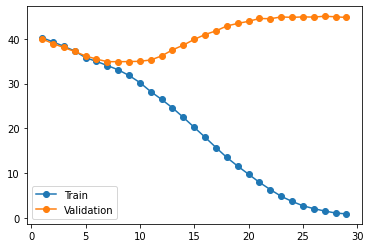

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['max_depth'], df['train_score'], marker = 'o', label = 'Train')
plt.plot(df['max_depth'], df['validation_score'], marker = 'o', label = 'Validation')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dt = DecisionTreeRegressor(random_state=10)

parameter_grid = {'max_depth': [6, 7, 8, 9], 
          'min_samples_split': range(2, 50, 5), 
         'max_leaf_nodes': range(2, 50, 5)}

gridsearch = GridSearchCV(estimator=dt, 
                          param_grid=parameter_grid,scoring = mean_squared_error, 
                          cv=5)

In [ ]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_leaf_nodes': range(2, 50, 5),
                         'min_samples_split': range(2, 50, 5)},
             scoring=<function mean_squared_error at 0x7fd5a3823a70>)

In [ ]:
gridsearch.best_params_

{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_split': 2}

In [ ]:
gridsearch.best_estimator_

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=2, random_state=10)

## Creating a decision tree instance with new hyperparameter values

In [ ]:
# Creating the decision tree function
dt=gridsearch.best_estimator_

In [ ]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=2, random_state=10)

In [ ]:
#predictions 
train_predict = dt.predict(X_train)
val_predict = dt.predict(X_valid)
test_predict = dt.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  40.259345315479294
Validation RMSE:  39.9930965817305


## RF

In [27]:
# Creating the random forest function
rf = RandomForestRegressor(random_state=10)

In [28]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [29]:
#predictions 
train_predict = rf.predict(X_train)
val_predict = rf.predict(X_valid)
test_predict = rf.predict(test_cleaned)

In [30]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  12.45997682725064
Validation RMSE:  33.18800511206903


## Tuning RF

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_params = {
    'max_depth': [20, 25, 30, 45, 60], 
    'min_samples_split': range(2, 30, 5), 
    'max_leaf_nodes': range(2, 10, 2),
    'n_estimators': [100, 300, 400, 500, 700]
    }

gridsearch = GridSearchCV(RandomForestRegressor(random_state=10), 
                                 param_grid = rf_params, 
                                 scoring = mean_squared_error, cv = 3, 
                                 verbose = 1,
                                 n_jobs = -1)

In [ ]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 45, 60],
                         'max_leaf_nodes': range(2, 10, 2),
                         'min_samples_split': range(2, 30, 5),
                         'n_estimators': [100, 300, 400, 500, 700]},
             scoring=<function mean_squared_error at 0x7fd5a3823a70>,
             verbose=1)

In [ ]:
gridsearch.best_params_

{'max_depth': 20,
 'max_leaf_nodes': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
gridsearch.best_estimator_

RandomForestRegressor(max_depth=20, max_leaf_nodes=2, random_state=10)

## Creating a random forest instance with new hyperparameter values

In [31]:
# Creating the random forest function
rf=RandomForestRegressor(max_depth=10,
                       n_estimators=1000, random_state=10)

In [32]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=10)

In [33]:
#predictions 
train_predict = rf.predict(X_train)
val_predict = rf.predict(X_valid)
test_predict = rf.predict(test_cleaned)

In [34]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  28.098061285182293
Validation RMSE:  32.24103803363999


## GBM

In [ ]:
# Creating the Gradient Boosting function
gbm = GradientBoostingRegressor(random_state=10)

In [ ]:
# Fitting the model
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=10)

In [ ]:
# Predictions 
train_predict = gbm.predict(X_train)
val_predict = gbm.predict(X_valid)
test_predict = gbm.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  33.55516367743069
Validation RMSE:  34.015391627586965


## Tuning GBM

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
gbm = GradientBoostingRegressor(random_state=10)

gbm_params = {'max_depth': [2, 3, 5, 7], 
          'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
          'n_estimators': [100, 200, 300, 400, 500]}

random_search = RandomizedSearchCV(gbm, 
                                   param_distributions = gbm_params, 
                                   scoring = mean_squared_error, cv = 3, 
                                   verbose = 3, n_iter = 10, n_jobs = -1)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [2, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring=<function mean_squared_error at 0x7fa90acb8a70>,
                   verbose=3)

In [ ]:
random_search.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 300}

In [ ]:
random_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=300,
                          random_state=10)

## Creating a GBM instance with new hyperparameter values

In [ ]:
# Creating the Gradient Boosting function
gbm = random_search.best_estimator_

In [ ]:
# Fitting the model
gbm.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=300,
                          random_state=10)

In [ ]:
# Predictions 
train_predict = gbm.predict(X_train)
val_predict = gbm.predict(X_valid)
test_predict = gbm.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  33.807956632002664
Validation RMSE:  34.527487769012076


## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
# Creating the XGB function
xg = xgb.XGBRegressor(random_state=10)

In [ ]:
# Fitting the model
xg.fit(X_train, y_train)

[03:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=10)

In [ ]:
# Predictions 
train_predict = xg.predict(X_train)
val_predict = xg.predict(X_valid)
test_predict = xg.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  33.63320313191661
Validation RMSE:  34.123797948758146


## Tuning XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xg = xgb.XGBRegressor(random_state=10)

xg_params = {'max_depth': [2, 3, 5, 7, 10], 
          'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
          'n_estimators': [100, 200, 300, 400, 500]
         }

random_search = RandomizedSearchCV(xg, 
                                   param_distributions = xg_params, 
                                   scoring = mean_squared_error, cv = 3, 
                                   verbose = 3, n_iter = 10, n_jobs = -1)        

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[03:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(random_state=10), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [2, 3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring=<function mean_squared_error at 0x7fac0ff49a70>,
                   verbose=3)

In [ ]:
random_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [ ]:
random_search.best_estimator_

XGBRegressor(n_estimators=200, random_state=10)

## Creating a XGBoost instance with new hyperparameter values

In [ ]:
# Creating the XGB function
xg = random_search.best_estimator_

In [ ]:
# Fitting the model
xg.fit(X_train, y_train)

[04:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=200, random_state=10)

In [ ]:
# Predictions 
train_predict = xg.predict(X_train)
val_predict = xg.predict(X_valid)
test_predict = xg.predict(test_cleaned)

In [ ]:
# RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,train_predict))
rmse_val=np.sqrt(mean_squared_error(y_valid,val_predict))
print('Training RMSE: ', rmse_train)
print('Validation RMSE: ', rmse_val)

Training RMSE:  32.86906821445218
Validation RMSE:  33.67233529214705


# Submission

In [35]:
TEST=pd.read_csv("sample_4E0BhPN.csv")
TEST['demand'] = test_predict
TEST.head(10)

,date,hour,demand
0,2021-03-01,0,57.930749
1,2021-03-01,1,52.698254
2,2021-03-01,2,51.795439
3,2021-03-01,3,51.179085
4,2021-03-01,5,47.013063
5,2021-03-01,6,45.328693
6,2021-03-01,7,73.032569
7,2021-03-01,8,80.878541
8,2021-03-01,9,78.216017
9,2021-03-01,10,75.023057


In [36]:
# Converting to csv format
TEST.to_csv('DanielThommanajobathonapril2022final.csv',index=False)